In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


# Exploratory Data anlysis
Objective : Given a new flower our objective is to identify weather it is setosa, versicolour or verginica

## Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
iris = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.shape #number of datapoints

(150, 5)

In [5]:
 iris.columns #what are the columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
# how many datapoints for each class are present?
# (OR) How many flowers for each variety are present?

iris['species'].value_counts()

# balanced data vs imbalanced data

# iris is a balanced dataset as the number of data points for every class is same


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Data Visualization 

## 2D Plot :

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

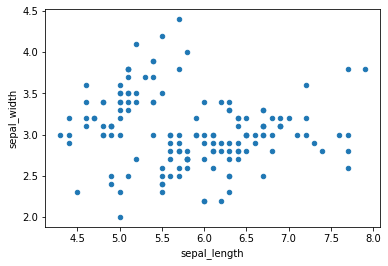

In [7]:
# 2-D scatter plot
iris.plot(kind ='scatter', x='sepal_length', y='sepal_width')

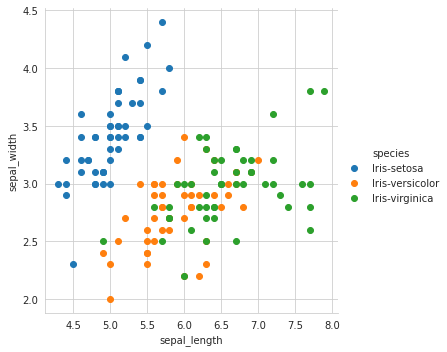

In [8]:
# 2-D plot with colour coding for each flower type/class
# hue='species' color the plot by the variety
sns.set_style('whitegrid');
sns.FacetGrid(iris, hue='species',height=5)\
   .map(plt.scatter,'sepal_length','sepal_width')\
   .add_legend()
plt.show();

* Notice that the blue points can be easily seperated from the red and green by drawing a line. But red and green data pointa cannot be easily seperated.
* Can we draw multiple 2-D scatter plots for each combination?
* How many combinations exist? 4C2 = 6

## Obervation(s):
* Using sepal.lenth and sepal.width features, we can distinguish Sentosa from others. i.e Linerly Seperable
* separating Versicolour from Virginica is mmuch harder than as they have considerable overlap.

## Pair-plot
pairwise scatter plot: pairplot

## Disadvantages :

* cannot be used when number of feature are high.
* cannot visualize higher dimentional patters in 3-D and 4-D
* only possible to view 2D patterns.

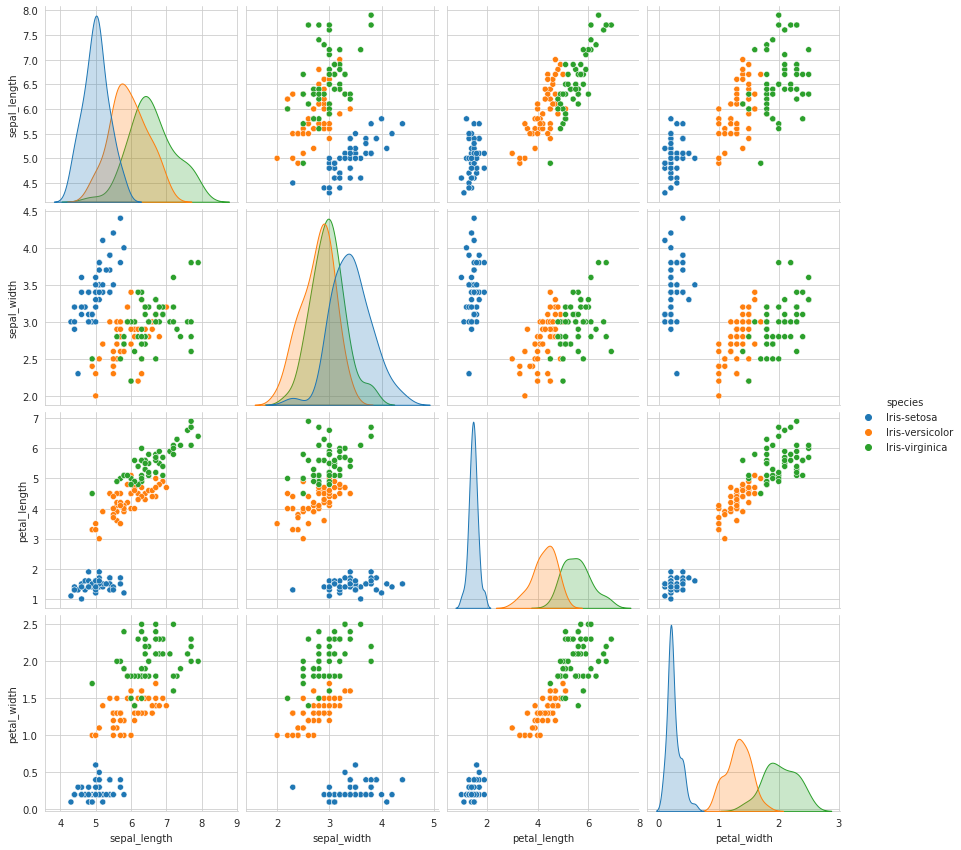

In [9]:
sns.set_style('whitegrid')
sns.pairplot(iris,hue='species',height=3);
plt.show()

**Note: The diagonal elements are PDF's for each feature.**

## Obervation(s):

* `petal.lenght` and `petal.width` are the most useful features to identify various flowers types.

* While Sentosa can be easily identified(linearly seperable), Virnica and Versicolor have some overlap(almost linearly separable)

* We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

## Limitations of pair-plot

* here in above example we had 4-dimentional data i.e(SL,SW,PL,PW) so 4C2 = 6

* if we have 10 features then, 10C2 and what if we have 100 features then, 100C2 these are a lot of plots to go through each plot and understand.

* pairplots are easy to understand when we have less number of features i.e (4,5,6)

* We need to use PCA, t-SNE to visualize a high dimentional data.

## Histogram, PDF, CDF

* what about 1-D scatter plot using just one feature? i.e 1-D Scatter plot of petal-length

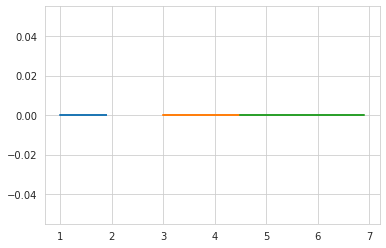

In [10]:
iris_setosa = iris.loc[iris['species'] == 'Iris-setosa']
iris_virginica = iris.loc[iris['species'] == 'Iris-virginica']
iris_versicolor = iris.loc[iris['species'] == 'Iris-versicolor']

#print(iris_sentosa['petal.length'])

plt.plot(iris_setosa['petal_length'],np.zeros_like(iris_setosa['petal_length']))
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']))
plt.plot(iris_virginica['petal_length'],np.zeros_like(iris_virginica['petal_length']))

plt.show()

Disadvantages of 1-D scatter plot: very hard to make sense as points are overlapping a lot.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

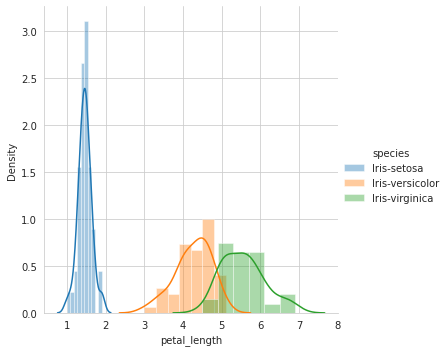

In [11]:
# Distrubution / Density plot of petal length of all flowers

sns.FacetGrid(iris, hue='species',height=5)\
   .map(sns.distplot, 'petal_length')\
   .add_legend()

plt.show()

PDF(curve) - Smoothed histogram (KDE)

How to build PDF's?

* First we plot histograms and then we smoothen the histogram to get PDF.

Intercepting a PDF:

* why it is called density plot?
* why it is called probability plot?

# Univariate analysis using PDF

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

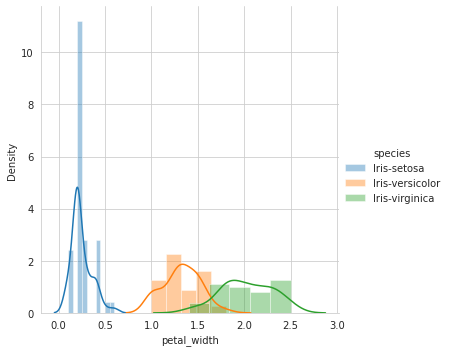

In [12]:
sns.FacetGrid(iris, hue='species',height=5)\
   .map(sns.distplot, 'petal_width')\
   .add_legend()

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

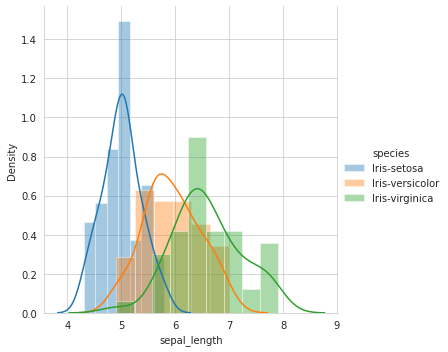

In [13]:
sns.FacetGrid(iris, hue='species',height=5)\
   .map(sns.distplot, 'sepal_length')\
   .add_legend()

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

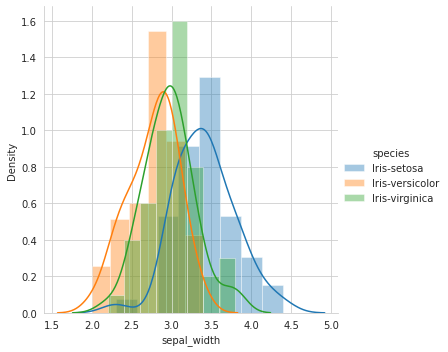

In [14]:
sns.FacetGrid(iris, hue='species',height=5)\
   .map(sns.distplot, 'sepal_width')\
   .add_legend()

plt.show()

## Obervation(s):

* by plotting the PDF's for all 4 features we have seen that petal.length is perfrming well on separating the class.

* `petal.width` is also somewhat performing well.

* If we need to choose single feature to classify the new instance, it should be `petal.length`

* if you want to classify based on two classes then it should be `petal.length` and `petal.width`

overall : **PL > PW >> SL >> SW**

## Cummulative Distribution Function ( CDF) :

* need for Cummulative Distribution Function(CDF)?
* we can visually see What percentage of versicolor flowers have a petal length of less than 5 ?

**How to construct a CDF?**

* For every value of your x axis i.e petal length you say how many points are below that x value

* Another method is to sum all the counts of histogram till the point on x axis. It is called a cummulative sum

* another way, area under the curve of the PDF at a given point on x axis is the CDF

* if you differentiate cdf you'll get pdf and if you do intergation on pdf you will get cdf

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


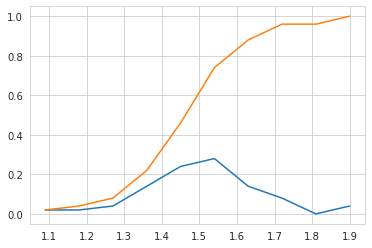

In [15]:
# plot CDF of petal length

counts, bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts)) # compute pdf
print(pdf)
print(bin_edges)

#compute CDF

cdf = np.cumsum(pdf) # numpy fun to calculate cummulative sum   
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show()

**How to read a CDF?**

* Blue line is a PDF and orange line is a CDF

* x axis : petal.lenth of Setosa flowers and y axis: probabilities

* PDF represents how many points it has in any range

* CDF represents: let's assume at any given point There are 82% of setosa flowers that have petal.length <= 1.6

    * 100 % of setosa flowers have petal.lenth less than 1.9
    * 15 % of setosa flowers have petal.length less than 1.3
    * percentage you can read on y-axis
    
* CDF always starts on 0 at left bottom and ends on 1 at right top

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


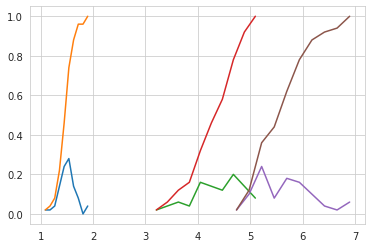

In [16]:
# plots of CDF of petal_length for various types of flowers.

# Miscalssification error if you use peta.length only.

# Setosa

counts, bin_edges = np.histogram(iris_setosa['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


# versicolor

counts, bin_edges = np.histogram(iris_versicolor['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


# virginica

counts, bin_edges = np.histogram(iris_virginica['petal_length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show()

## Obervation(s)
* PDF's and CDF's for setosa, versicolor and virginica w.r.t petal length

* if PL < 2 then setosa - 100% acccurate
 
* if PL > 2 and PL <= 5 then versicolor - 95% of times correct and 5% times incorrect

* if PL > 2 and PL > 5 then virsicolor - 90% of times correct and 10% of times incorrect

## Mean, variance and Standard deviation

In [17]:
# mean, varience , std-deviation

# mean tells us about central tendancy, the average. 

'''mean : sum of all values divided my total number of values'''

print('Means:')
print('setosa :',np.mean(iris_setosa['petal_length']))
print('Setosa Mean with an outlier :',np.mean(np.append(iris_setosa['petal_length'],50))) #mean with an outlier
print('Verginica :',np.mean(iris_virginica['petal_length']))
print('Versicolor :',np.mean(iris_versicolor['petal_length']))

print("\nStd-dev:")
print(np.std(iris_setosa['petal_length']))
print(np.std(iris_virginica['petal_length']))
print(np.std(iris_versicolor['petal_length']))

Means:
setosa : 1.464
Setosa Mean with an outlier : 2.4156862745098038
Verginica : 5.5520000000000005
Versicolor : 4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


**Varience** : How far the points are spread across the mean

- What is the average square distance of each point from the mean value.

**Standard deviation** : measure of how dispersed the data is in relation to the mean.

- Low standard deviation means data are clustered around the mean.
- High standard deviation indicates data are more spread out.

## median, Percentile, Quartile , IQR, MAD

**median** :

1. First sort items incr/decr order
2. pick the middle value

* median will not get corrupted due to the some outliers, but if more than 50 percent values are currupted then the median gets currupted.

In [18]:
print("\n Medians:")
print(np.median(iris_setosa['petal_length']))
print(np.median(np.append(iris_setosa['petal_length'],50))) # median with an outlier
print(np.median(iris_virginica['petal_length']))
print(np.median(iris_versicolor['petal_length']))


 Medians:
1.5
1.5
5.55
4.35


## Percentile :

- If the value is at 5Oth position in an given array it is called as 50th percentile. It tells us than about 50 percent values are less than this value and about 50 percent values are greater than this value.

- **Median = 50th percentile value of x = Xs[50] where Xs is an array**

- **25th , 50th, 75th and 100th percentiles are called Quantiles**

**Delivery Example** : To understand the number of days it takes for the delivery. When we check 95th or 99th percentile of delivery days, it gives us the insights about how many days it takes to deliver a package for 95 or 99 % times.

In [19]:
print("\n Quantiles:")
print(np.percentile(iris_setosa['petal_length'],np.arange(0,100,25)))
print(np.percentile(iris_virginica['petal_length'],np.arange(0,100,25)))
print(np.percentile(iris_versicolor['petal_length'],np.arange(0,100,25)))


 Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]


In [20]:
print("\n 90th Percentiles:")
print(np.percentile(iris_setosa['petal_length'],90))
print(np.percentile(iris_virginica['petal_length'],90))
print(np.percentile(iris_versicolor['petal_length'],90))


 90th Percentiles:
1.7
6.31
4.8


## Median Absolute Deviation

In [21]:
# MAD is not available in numpy so we need to import robust from statsmodel 
from statsmodels import robust 

In [22]:
print("\n Median Absolute Deviation")

print(robust.mad(iris_setosa['petal_length']))
print(robust.mad(iris_virginica['petal_length']))
print(robust.mad(iris_versicolor['petal_length']))


 Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


## Box-plot and Whiskers

- Box-plot with whiskers : another method of visualizing the 1-D scatter plot
- Box-plot can be visualized as a PDF on the side-ways.

Note : In the plot below, a technique call inter-quartile range is used in whiskers in the plot below do not correspond to the min and max values.

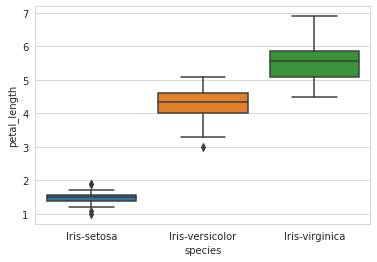

In [23]:
sns.boxplot(x = 'species', y='petal_length', data=iris)
plt.show()

## Violin plots

- A violin plot combines the benefits of the previous two plots and simplifies them

- Denser regions of the dataare fatter, and sparser ones thinner in a violin plot

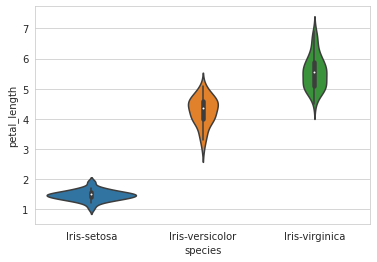

In [24]:
sns.violinplot(x='species', y = 'petal_length', data = iris, size = 8)
plt.show()

## Multivariate probability density, contour plot

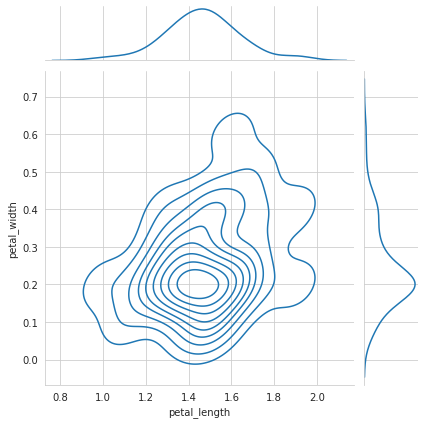

In [25]:
# 2D Density plot, contors-plot
sns.jointplot(x='petal_length',y='petal_width', data = iris_setosa, kind = 'kde')
plt.show()

- 1D density : PDF(probability density function)
- 2D density : CPDF(contour probability density function)

# Q-Q Plot

In [26]:
import numpy as np
import pylab
import scipy.stats as stats

# N(0,1)

std_normal = np.random.normal(loc = 0, scale = 1, size = 1000) #loc -> mean, scale -> std_dev

# 0 to 1000th percentile of std_normal

for i in range(0,101):
    print(i,np.percentile(std_normal,i))

0 -2.8617537219902287
1 -2.2005191500290295
2 -2.0238560636573406
3 -1.8072637194784746
4 -1.6818756431268398
5 -1.5799924543265942
6 -1.5093270393604745
7 -1.4439604206668504
8 -1.34277269856487
9 -1.2496771819506933
10 -1.2099397053532743
11 -1.139561837087367
12 -1.1000372905075355
13 -1.0688843823928178
14 -1.0149700845062268
15 -0.9751897106194327
16 -0.9404092364803572
17 -0.8929964460062836
18 -0.8628572322367952
19 -0.8345467530961563
20 -0.8072608009808411
21 -0.7547408900512155
22 -0.7243237972003012
23 -0.7073251717378766
24 -0.6791509509058877
25 -0.6411826293125695
26 -0.6252629686531211
27 -0.5925634825830305
28 -0.5629716743907335
29 -0.5247512979628628
30 -0.4954944570953665
31 -0.454969993587653
32 -0.4199383692236968
33 -0.3924257004819872
34 -0.36569423424340675
35 -0.3463359202360723
36 -0.3206857489536186
37 -0.29442389977501254
38 -0.280813188792704
39 -0.2592920420794245
40 -0.2398301139606239
41 -0.21573547850643657
42 -0.19125972461744037
43 -0.1657423757490536

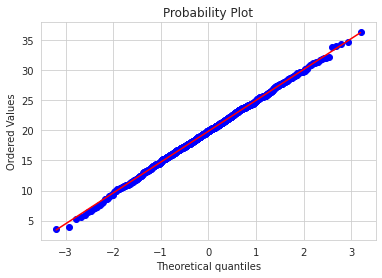

In [27]:
# generate 100 samples from (20,5)

measurements = np.random.normal(loc = 20, scale = 5, size = 1000)
# try size = 1000

stats.probplot(measurements,dist='norm', plot=pylab)
pylab.show()

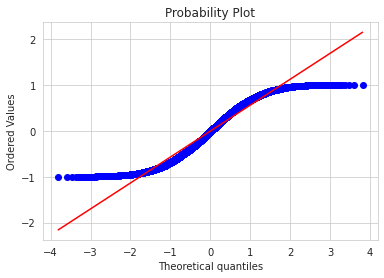

In [28]:
# Genearte with Uniform distribution

measurements = np.random.uniform(low = -1, high = 1, size = 10000)
# try size = 1000

stats.probplot(measurements,dist='norm', plot=pylab)
pylab.show()

For some plots we have left the questions intentianally so that you can read more about it or brainstom on it. Some plots we have not mentioned the explanations, let us know in the comments how you will interpret those plots.

Feel free to use this notebook as template for your Data Analysis projects.

If you have any suggetions please let us know in the comments section. Upvote the notebook if you found this helpful.